Deepnote a pas l'air assez puissant pour faire tous les calculs

In [ ]:
from math import sqrt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]


In [ ]:
spotify_data_quanti = spotify_data_cleaned[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence"]]

In [ ]:
spotify_data_quanti= spotify_data_cleaned[["track_popularity","danceability","energy","speechiness","acousticness","liveness","valence"]]
spotify_data_quanti.track_popularity = spotify_data_quanti.track_popularity / 100
spotify_data_quanti.track_popularity
spotify_data_quanti

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,track_popularity,danceability,energy,speechiness,acousticness,liveness,valence
0,0.66,0.748,0.916,0.0583,0.102000,0.0653,0.5180
1,0.67,0.726,0.815,0.0373,0.072400,0.3570,0.6930
2,0.70,0.675,0.931,0.0742,0.079400,0.1100,0.6130
3,0.60,0.718,0.930,0.1020,0.028700,0.2040,0.2770
4,0.69,0.650,0.833,0.0359,0.080300,0.0833,0.7250
...,...,...,...,...,...,...,...
32826,0.47,0.645,0.832,0.0294,0.001060,0.1990,0.3750
32827,0.27,0.581,0.640,0.0365,0.026600,0.5720,0.2880
32828,0.42,0.428,0.922,0.0936,0.076600,0.0668,0.2100
32830,0.14,0.529,0.821,0.0481,0.108000,0.1500,0.4360


In [ ]:
spotify_data_quant = spotify_data_quanti.to_numpy()

In [ ]:
n,p = spotify_data_quant.shape
M = np.eye(p)

In [ ]:

Dp = 1/n * np.eye(n)
#deepnote kiffe pas ça, il faut télécharger le fichier sr ton pc sinon

In [ ]:
notes_mean = spotify_data_quant.mean(axis=0)
spotify_data_quant = spotify_data_quant - notes_mean

In [ ]:
V = spotify_data_quant.T @ Dp @ spotify_data_quant


NameError: name 'Dp' is not defined

In [ ]:
import scipy.linalg as linalg
valp, vecp = linalg.eigh(V @ M)
valp = valp[::-1] # Ordre décroissant
vecp = vecp[:, ::-1]


In [ ]:
C = spotify_data_quant @ M @ vecp

In [ ]:
inverseDesEcartType = np.zeros(p)
for i in range(p):
    inverseDesEcartType[i]=1/spotify_data_quant[:,i].std()
inverseDesEcartType


array([4.47273941, 6.97188084, 5.56821504, 9.86097296, 4.54943583,
       6.64018723, 4.32341138])

In [ ]:
notesReduites = spotify_data_quant * inverseDesEcartType


In [ ]:
termeAvecLambda = np.zeros(p)
for i in range(p):
    termeAvecLambda[i] = sqrt(valp[i])
termeAvecLambda= 1/termeAvecLambda

In [ ]:
composantesPrincipalesNormees = C * termeAvecLambda

In [ ]:
cov =notesReduites.T @ Dp @ composantesPrincipalesNormees


In [ ]:
def add_labels(x_list,y_list,labels):
    for x,y,label in zip(x_list,y_list,labels):
        plt.text(x+0.05,y-0.05,label)

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


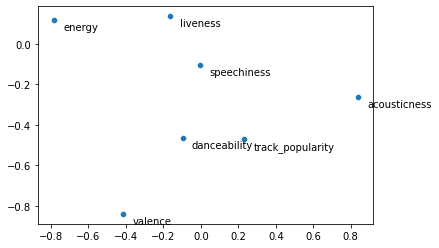

In [ ]:
sns.scatterplot(cov[:,0],cov[:,1])
add_labels(cov[:,0],cov[:,1], spotify_data_quanti.head())

In [ ]:
cls = PCA(n_components=7)
pcs = cls.fit_transform(spotify_data_quant)
cls.components_

array([[ 0.20074007, -0.05420294, -0.54668493, -0.00118439,  0.71532252,
        -0.09541626, -0.37028244],
       [-0.43804819, -0.2792384 ,  0.08691026, -0.0433553 , -0.23966172,
         0.08582307, -0.80987856],
       [-0.87326354,  0.08188216, -0.12637256,  0.01936515,  0.32237812,
        -0.028088  ,  0.33112609],
       [ 0.06581953, -0.40504012,  0.31400779, -0.02491683,  0.35366041,
         0.7706076 ,  0.11608957],
       [-0.02828398,  0.58328734, -0.40807446,  0.2389681 , -0.23460562,
         0.60704368, -0.10864411],
       [-0.00853253, -0.55526467, -0.64061189, -0.24036643, -0.38052257,
         0.09714317,  0.26308649],
       [ 0.00479621, -0.31588413, -0.04585759,  0.939277  , -0.04511531,
        -0.10472014,  0.05336959]])

<BarContainer object of 7 artists>

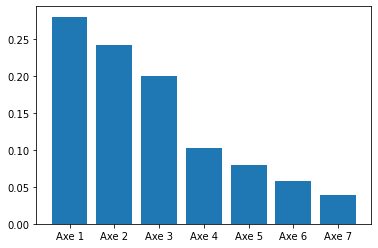

In [ ]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5","Axe 6","Axe 7"], cls.explained_variance_ratio_)

In [ ]:
spotify_data_cleaned = spotify_data_cleaned.assign(
        populartity_quali = "tresPopulaire"
)

In [ ]:
mask1 = spotify_data_cleaned.track_popularity <= 80
mask2 = spotify_data_cleaned.track_popularity <=60
mask3 = spotify_data_cleaned.track_popularity <=40
mask4 = spotify_data_cleaned.track_popularity <=20

spotify_data_cleaned.loc[mask1,"popularity_quali"] = "bienPopulaire"
spotify_data_cleaned.loc[mask2,"popularity_quali"] = "moyennementPopulaire"
spotify_data_cleaned.loc[mask3,"popularity_quali"] = "bofPopulaire"
spotify_data_cleaned.loc[mask4,"popularity_quali"] = "pasPopulaire"

<AxesSubplot:>

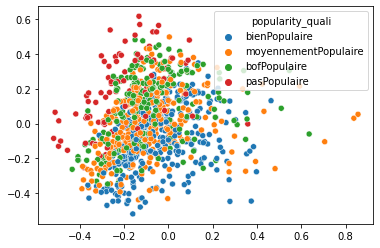

In [ ]:
sns.scatterplot(x=pcs[:1000,0],y=pcs[:1000,1],hue=spotify_data_cleaned.popularity_quali[:1000])

<AxesSubplot:>

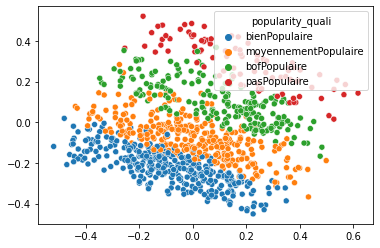

In [ ]:
sns.scatterplot(x=pcs[:1000,1],y=pcs[:1000,2],hue=spotify_data_cleaned.popularity_quali[:1000],size=spotify_data_cleaned.playlist_genre[:1000])

<AxesSubplot:>

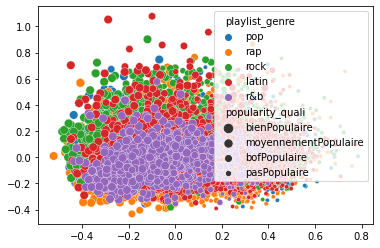

In [ ]:
sns.scatterplot(x=pcs[:20000,2],y=pcs[:20000,3],size=spotify_data_cleaned.popularity_quali[:20000],hue=spotify_data_cleaned.playlist_genre[:20000])

<AxesSubplot:>

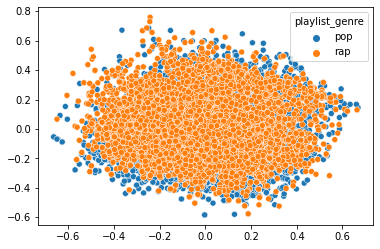

In [ ]:
sns.scatterplot(x=pcs[:10000,1],y=pcs[:10000,2],hue=spotify_data_cleaned.playlist_genre[:10000])

<AxesSubplot:>

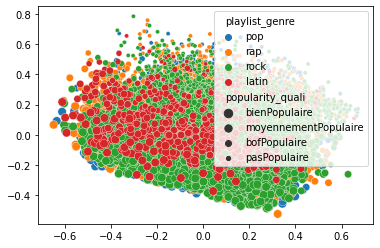

In [ ]:
sns.scatterplot(x=pcs[:15000,1],y=pcs[:15000,2],hue=spotify_data_cleaned.playlist_genre[:15000],size=spotify_data_cleaned.popularity_quali[:15000])

<AxesSubplot:>

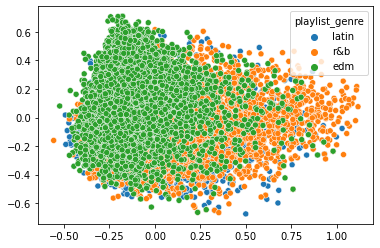

In [ ]:
sns.scatterplot(x=pcs[15000:,0],y=pcs[15000:,1],hue=spotify_data_cleaned.playlist_genre[15000:])

<AxesSubplot:>

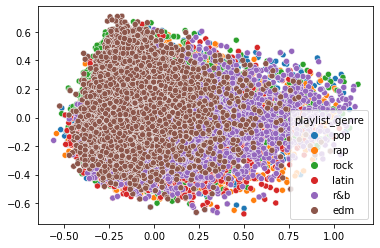

In [ ]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=spotify_data_cleaned.playlist_genre)

<AxesSubplot:>

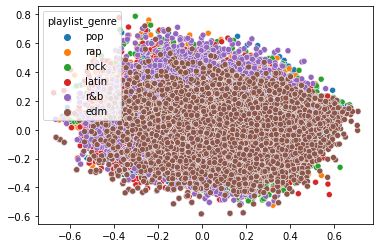

In [ ]:
sns.scatterplot(x=pcs[:,1],y=pcs[:,2],hue=spotify_data_cleaned.playlist_genre)

<AxesSubplot:>

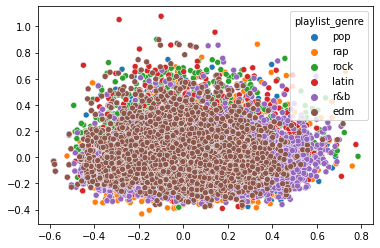

In [ ]:
sns.scatterplot(x=pcs[:,2],y=pcs[:,3],hue=spotify_data_cleaned.playlist_genre)

<AxesSubplot:>

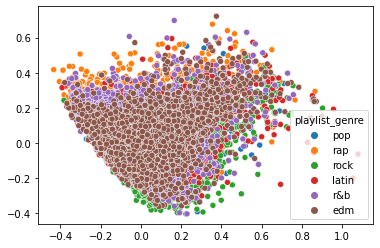

In [ ]:
sns.scatterplot(x=pcs[:,3],y=pcs[:,4],hue=spotify_data_cleaned.playlist_genre)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>